# frequency domain source inversion on csic data

## 1.1 preparation for source inversion
#### import libraries
#### load data from estimated Green's functions, represented by the received signals from (relatively) wide-band received signals generating from a Gaussian stf
#### load observed data from experimental signals

In [1]:
#%%capture
#execfile('plot_csic_main')
execfile('plib_load.py')

syn_file='Up_csic_rgauss_chi_f03000000_DT4d_9'
#obs_file='obsFan01_SRC08_ts2500_mat'

obs_file='emFan01_SRC08_ts350_mat'
execfile('pinitial_data_load.py')

('the shape of the observed data: ', (3360, 176))
('the shape of the synthetic data: ', (42000, 176))
('synpath: ', 'obf/input/Up_csic_rgauss_chi_f03000000_DT4d_9.su')
('obspath: ', 'obf/input/emFan01_SRC08_ts350_mat.mat')


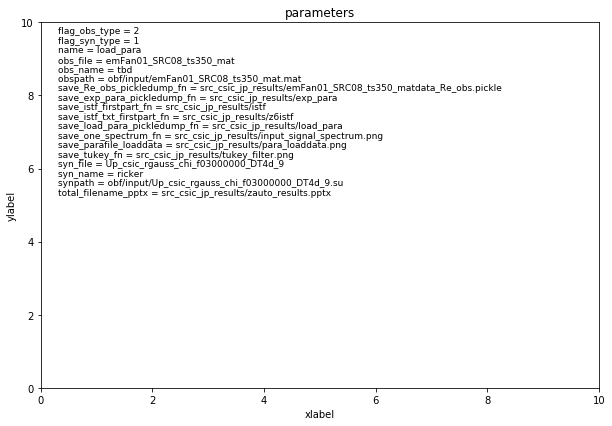

In [2]:
textplot(load_para,save_parafile_loaddata,flag_close=0)

### 1.2 all constants are created here 

UpSampleFactor : 0.0800000000000000017 
sampling rate fsNewsyncomp after resampling : 250000000.000000 Hz
0
21
('freq_step_starNewobs', 0)
('freq_step_endNewobs', 262)
('freq_step_starNewsyn', 0)
('freq_step_endNewsyn', 262)
textplot- run


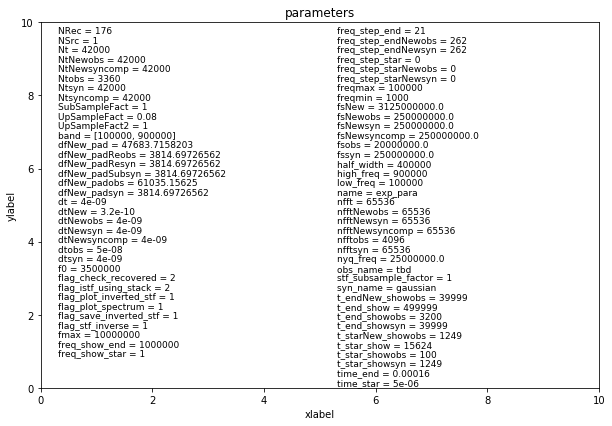

In [3]:
execfile('pconstant_setup_42000.py')

###  1.3 individual trace preprocessing

#### 1.3.1 loading, interpolation, and fft

In [4]:
trace_seleted = 89
trace_num = trace_seleted
# output: traceNew_obs,traceNew_syn，yf_Newobs，yf_Newsyn
execfile('ptraceprepare.py')

#### 1.3.2 just to plot the fft spectrum


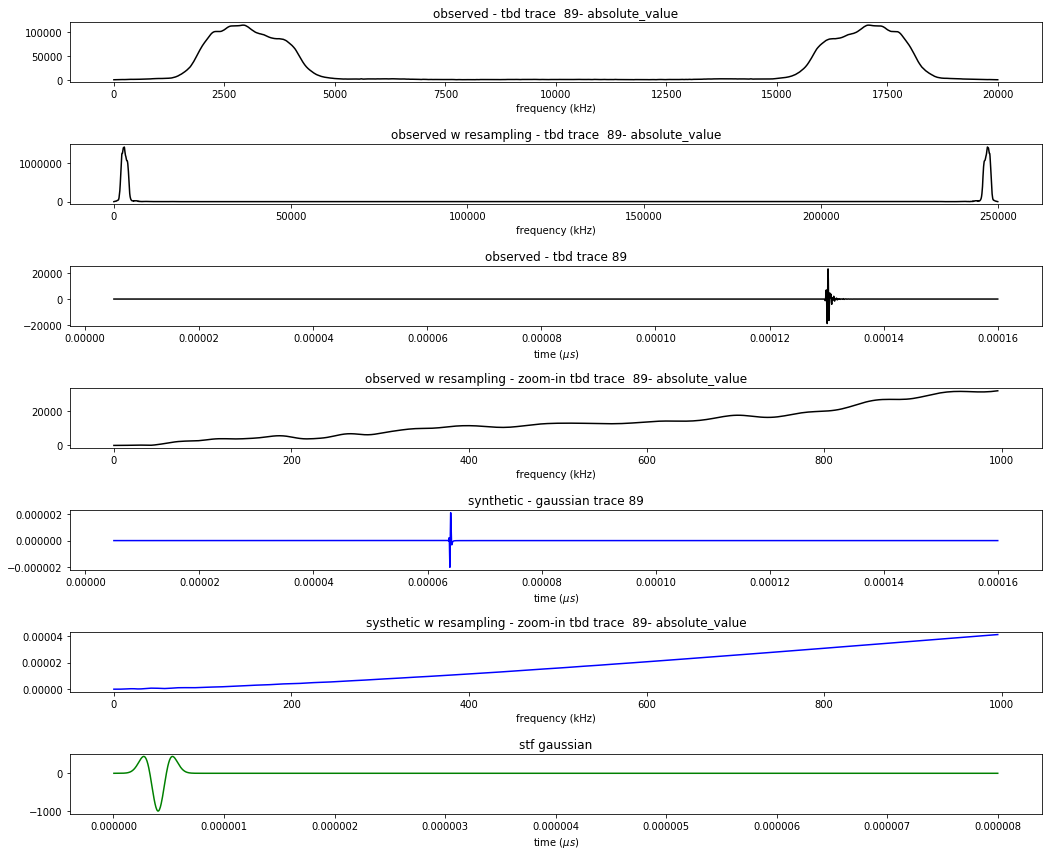

In [5]:
execfile('pplot_one_spectrum.py')

#### 1.3.3 filer in the frequency domain 

('tukey_length', 2097)
('nfft', 65536)
('nfftNewobs', 65536)
('freq_pos.shape - tukey', (2097,))
('freq_pos.shape - pad', (2097,))
('freq_pos.shape - resize', (32768,))
('freq_neg.shape - freq_pos[::-1]', (32768,))
('syn_taper.shape - append', (65536,))


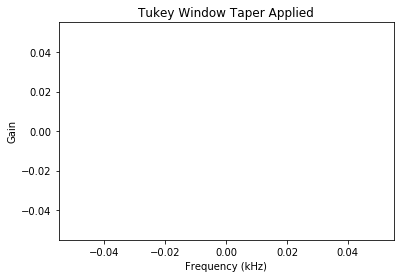

In [6]:
# filer in the frequency domain 
execfile('ptukey.py')

### 1.5 the actual source inversion program !!!!

In [7]:
# by controlling the range of the traces, chose stacked or not stacked  
inv_trace_num_star = trace_seleted
inv_trace_num_end = trace_seleted+1 
# inv_trace_num_star = 80
# inv_trace_num_end = 96+1 
execfile('pstf_inverse.py')

('trace_num is ', 89)


### 1.6 filtering the inverted stf signal using a bandpass filter

In [8]:
%%capture
execfile('pconstant_setup_42000.py')
execfile('pfilter_istf.py')

### 1.7 ploting the inverted stf/sff, with attempts for further improvements using detrend or filtering

UpSampleFactor : 0.0800000000000000017 
sampling rate fsNewsyncomp after resampling : 250000000.000000 Hz
0
21
('freq_step_starNewobs', 0)
('freq_step_endNewobs', 262)
('freq_step_starNewsyn', 0)
('freq_step_endNewsyn', 262)
textplot- run


/home/jiazeh/Desktop/my_files/py2project/venv/lib/python2.7/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/jiazeh/Desktop/my_files/py2project/venv/lib/python2.7/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


('istf_png', 'src_csic_jp_results/istfsrc01_rec89_trstar089_trend090fmin1000_fmax100000.png')


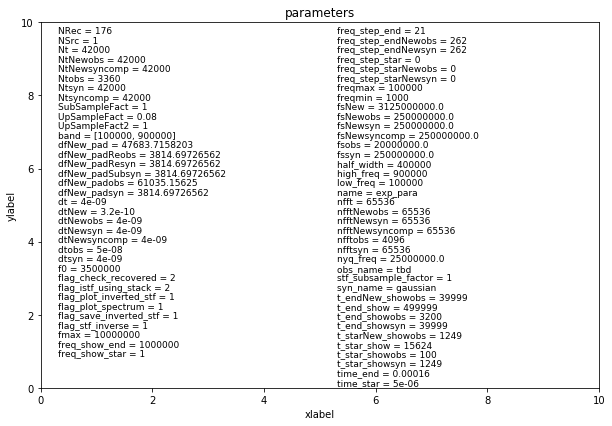

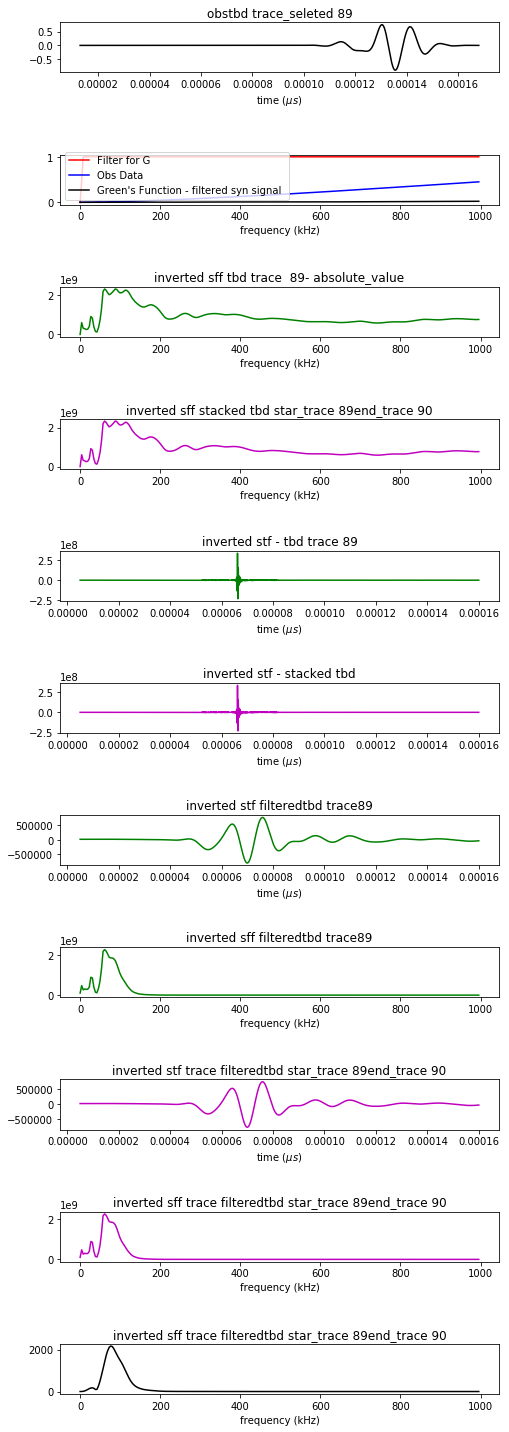

In [9]:
execfile('pconstant_setup_42000.py')
execfile('pstf_inverse_plot.py')

#### 1.7.0.1 Filtering the inverted stf signal using a bandpass filter in low frequency range 

In [117]:
%%capture
execfile('pconstant_setup_42000.py')
execfile('pfilter_istf.py')

#### 1.7.0.2 Ploting the inverted stf/sff, within the above filtered frequency range, to be used for FWI

UpSampleFactor : 0.0800000000000000017 
sampling rate fsNewsyncomp after resampling : 250000000.000000 Hz
0
21
('freq_step_starNewobs', 0)
('freq_step_endNewobs', 262)
('freq_step_starNewsyn', 0)
('freq_step_endNewsyn', 262)
textplot- run
('istf_png', 'src_csic_jp_results/istfsrc01_rec89_trstar089_trend090fmin1000_fmax100000.png')


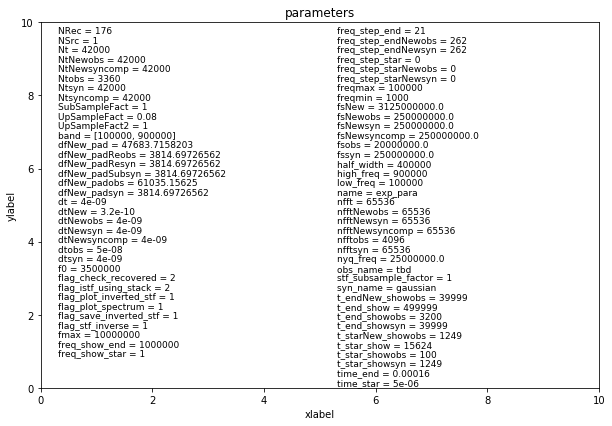

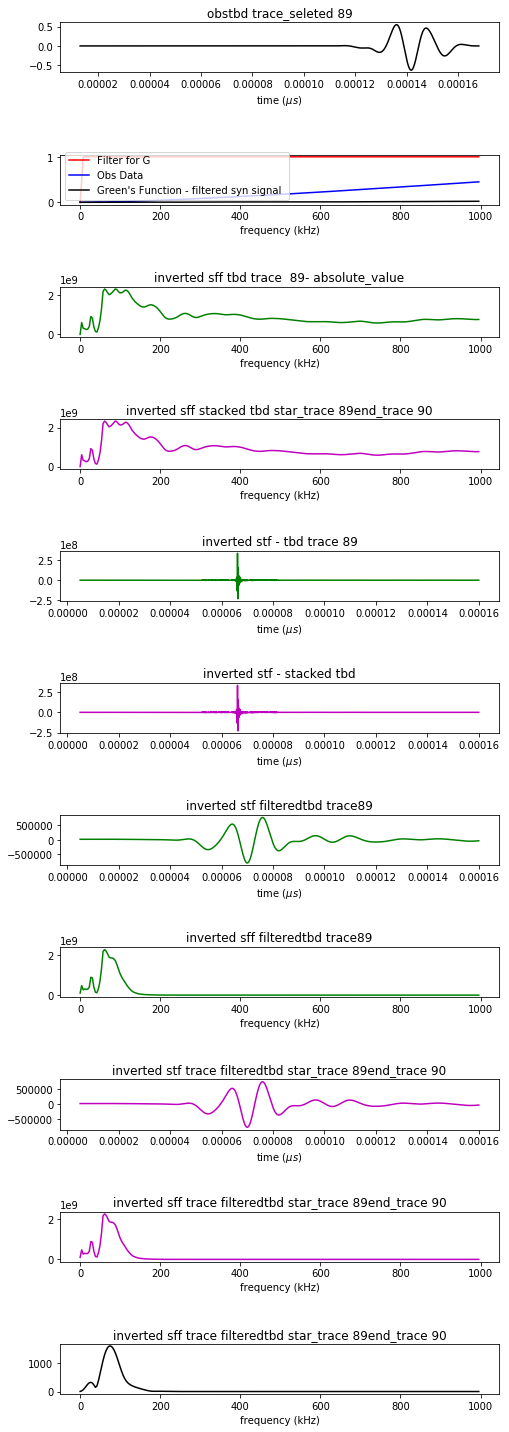

In [118]:
execfile('pconstant_setup_42000.py')
execfile('pstf_inverse_plot.py')

In [33]:
empty_trace_89 = traceNew_obs_filtered

In [ ]:
yem = np.abs(yf_traceNew_obs_filtered)

In [ ]:
plt.plot(yem)

In [ ]:
yobs = np.abs(yf_traceNew_obs_filtered)

In [ ]:
plt.plot(yobs)

In [ ]:
ratio_yobs_yem = yobs / yem

In [ ]:
ratio_yobs_yem.shape

In [ ]:
plt.plot(xf_Newobs[freq_step_starNewobs:freq_step_endNewobs]/1000,ratio_yobs_yem[freq_step_starNewobs:freq_step_endNewobs])

In [ ]:
plt.plot(xf_Newobs[50:1200]/1000,ratio_yobs_yem[50:1200])

In [ ]:
xf_Newobs[524:525]/1000

In [ ]:
xf_Newobs[787:788]/1000

In [ ]:
ratio_yobs_yem[524]

In [ ]:
ratio_yobs_yem[787]

### 1.7.1 full spectrum replot, after reload twices: one is empty and nonempty scan

freq_step_endNewobs = 1400

fig, (ax2,ax9,ax10) = plt.subplots(nrows=3)

ax2.plot(xf_Newobs[freq_step_starNewobs:freq_step_endNewobs]/1000,np.abs(yem[freq_step_starNewobs:freq_step_endNewobs]),'-g')
ax2.set_title('inverted sff ' + str(obs_name) + ' trace  ' + str(trace_num) + '- absolute_value')
ax2.set_xlabel('frequency (kHz)')

ax9.plot(xf_Newobs[freq_step_starNewobs:freq_step_endNewobs]/1000,np.abs(yobs[freq_step_starNewobs:freq_step_endNewobs]),'-m')
ax9.set_title('inverted sff trace filtered' + str(obs_name) + ' star_trace '+str(inv_trace_num_star)+ 'end_trace '+str(inv_trace_num_end))
ax9.set_xlabel('frequency (kHz)')

ax10.plot(xf_Newobs[freq_step_starNewobs:freq_step_endNewobs]/1000,np.abs(ratio_yobs_yem[freq_step_starNewobs:freq_step_endNewobs]),'-k')
ax10.set_title('inverted sff trace filtered' + str(obs_name) + ' star_trace '+str(inv_trace_num_star)+ 'end_trace '+str(inv_trace_num_end))
ax10.set_xlabel('frequency (kHz)')

plt.tight_layout(rect=[0, 0, 1.5, 1.2])

### 1.7.2 spectrum replot for a frequency range, after reload twices: one is empty and nonempty scan


freq_step_starNewobs = 20
freq_step_endNewobs = 200

fig, (ax2,ax9,ax10) = plt.subplots(nrows=3)

ax2.plot(xf_Newobs[freq_step_starNewobs:freq_step_endNewobs]/1000,np.abs(yem[freq_step_starNewobs:freq_step_endNewobs]),'-g')
ax2.set_title('empty')
ax2.set_xlabel('frequency (kHz)')

ax9.plot(xf_Newobs[freq_step_starNewobs:freq_step_endNewobs]/1000,np.abs(yobs[freq_step_starNewobs:freq_step_endNewobs]),'-m')
ax9.set_title('nonempty')
ax9.set_xlabel('frequency (kHz)')

ax10.plot(xf_Newobs[freq_step_starNewobs:freq_step_endNewobs]/1000,np.abs(ratio_yobs_yem[freq_step_starNewobs:freq_step_endNewobs]),'-k')
ax10.set_title('ratio')
ax10.set_xlabel('frequency (kHz)')

plt.tight_layout(rect=[0, 0, 1.5, 1.2])

In [168]:
Ntsyncomp

42000

### 1.8 save source inversion as txt - first inversion

In [ ]:
#### output the txt file: t_totalNew_obs and stf_inverted_trace_filtered
### old way, do not use again 
#execfile('pistf_save.py')

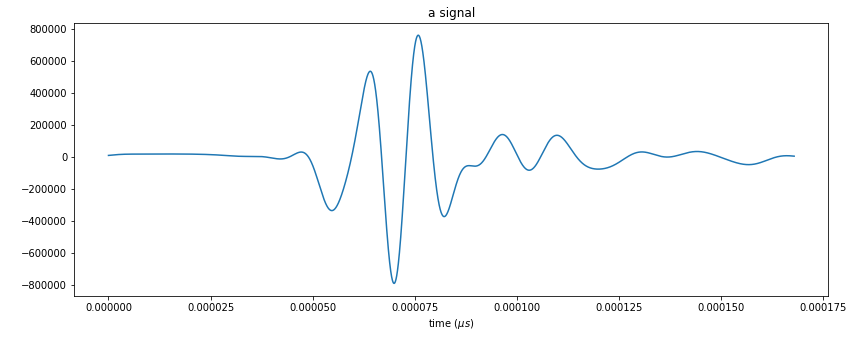

In [147]:
from myFormat.ze_plot_summary import one_signal_plot

one_signal_plot(t_totalNew_obs[0:42000],stf_inverted_trace_filtered[0:42000])

In [171]:
#np.append(stf_inverted_trace_filtered[star_factor:42000])

# remove delay
star_factor2 = 8000
a = np.zeros(star_factor2)
stf_inverted_trace_filtered_temp = np.append(stf_inverted_trace_filtered[star_factor2:Ntsyn],a, axis=0)
# get rid of values in the begining, to avoid errors in the propagation period
star_factor = 1000
a = np.zeros(star_factor)
#stf_inverted_trace_filtered_shifted = np.append(a, stf_inverted_trace_filtered[:time_step_comp], axis=0)
stf_inverted_trace_filtered_temp = np.append(a,stf_inverted_trace_filtered_temp[star_factor:Ntsyn], axis=0)

# padding zeros after such that specfem can be run with enough steps 
end_factor3 =  58000 - Ntsyn
a = np.zeros(end_factor3)

stf_inverted_trace_filtered_temp = np.append(stf_inverted_trace_filtered_temp,a, axis=0)
stf_inverted_trace_filtered_full = bandpass(stf_inverted_trace_filtered_temp, freqmin, freqmax, fsNewobs, zerophase=True)

stf_inverted_trace_filtered_comp = stf_inverted_trace_filtered_full[0:58000:SubSampleFact]
## time array - aftering resampling 
# t_totalNew_obs2 = np.arange(dtNewobs,len(stf_inverted_trace_filtered5)*dtNewobs+dtNewobs,dtNewobs)
# NtsynNew = len(t_totalNew_obs2)

### if do not need manual delay adjustment
stf_inverted_trace_filtered5 = stf_inverted_trace_filtered

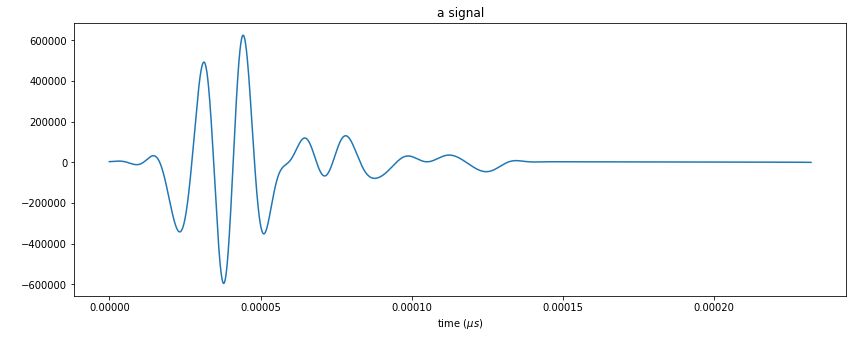

In [183]:
from myFormat.ze_plot_summary import one_signal_plot
dtNewFinal = 4e-9
t_totalNew_obs_force = np.arange(dtNewFinal,58000*dtNewFinal+dtNewFinal,dtNewFinal)
one_signal_plot(t_totalNew_obs_force,stf_inverted_trace_filtered_comp)


#### 1.8.0.2 resampling before saving 

In [195]:
dtNewSave= 4e-8
t_totalNew_comp = np.arange(dtNewSave,5800*dtNewSave+dtNewSave,dtNewSave)
print('shape of t_totalNew_comp ', t_totalNew_comp.shape)

('shape of t_totalNew_comp ', (5800,))


In [196]:
tck2 = interpolate.splrep(t_totalNew_obs_force, stf_inverted_trace_filtered_comp, s=0)
stf_inverted_stack_trace_filtered_resampled = interpolate.splev(t_totalNew_comp, tck2, der=0)

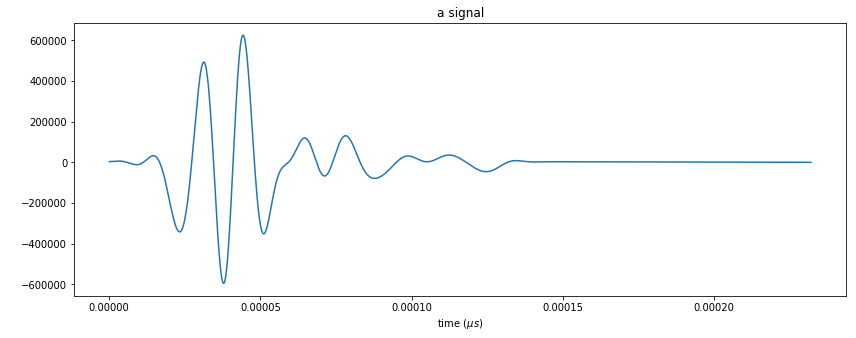

In [197]:
from myFormat.ze_plot_summary import one_signal_plot

one_signal_plot(t_totalNew_comp,stf_inverted_stack_trace_filtered_resampled)

In [200]:
t_totalNew_comp.shape

(5800,)

In [201]:
stf_inverted_stack_trace_filtered_resampled.shape

(5800,)

In [202]:
flag_istf_using_stack

2

In [204]:
# new way of saving istf
if flag_save_inverted_stf is 1:
   save_istf_txt_complete_fn = save_istf_txt_firstpart_fn  + '_trstar%03d_trend%03d' % (inv_trace_num_star,inv_trace_num_end)
   if (flag_istf_using_stack is 1): 
       t_total_write = t_totalNew_comp
       stf_write=stf_inverted_stack_trace_filtered_resampled
       
   elif (flag_istf_using_stack is 2): 
       t_total_write = t_totalNew_comp
       stf_write=stf_inverted_stack_trace_filtered_resampled
       NtNewsyncomp = 5800
   execfile('pistf_save_func.py')


In [90]:
save_istf_txt_complete_fn

'src_csic_jp_results/z6istf_trstar089_trend090'

#### 1.8.1 cross correlation for the travel time difference, before rerun simulation.  - time steps

('stf_inverted_trace_filtered shape', (65536,))
('stf_inverted_trace_filtered5 shape', (42000,))
('t_totalNew_obs', (42000,))
UpSampleFactor : 0.8000000000000000444 
sampling rate fsNewsyncomp after resampling : 25000000.000000 Hz
0
2359
('freq_step_starNewobs', 0)
('freq_step_endNewobs', 2949)
('freq_step_starNewsyn', 0)
('freq_step_endNewsyn', 2949)
textplot- run
('difference in time in s for regenerated inverted source:', 0.00012184)
('time delay:', 3046)


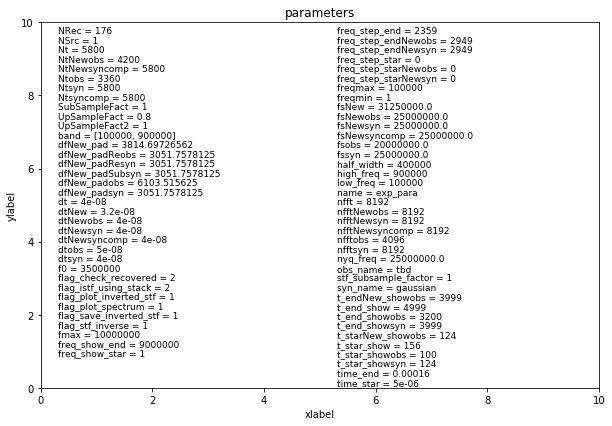

In [44]:
print('stf_inverted_trace_filtered shape',stf_inverted_trace_filtered.shape)
print('stf_inverted_trace_filtered5 shape',stf_inverted_trace_filtered_comp.shape)
print('t_totalNew_obs',t_totalNew_obs.shape)
execfile('pconstant_setup.py')
### travel time 
NtsynNew = NtNewsyn
from seisflows.plugins.misfit import Traveltime
time_step_comp = NtsynNew
time_diff = Traveltime(stf_inverted_trace_filtered[:NtsynNew:stf_subsample_factor],stf_inverted_trace_filtered_comp[:NtsynNew:stf_subsample_factor],time_step_comp,dtNewobs)
print('difference in time in s for regenerated inverted source:', time_diff)
time_delay = int(round(time_diff/dtNewobs)) 
print('time delay:', time_delay)

In [ ]:
stf_inverted_trace_filtered_comp.shape

#### 1.8.2 delay adjustment

In [45]:
a = np.zeros(np.abs(time_delay))
#stf_inverted_trace_filtered_shifted = np.append(a, stf_inverted_trace_filtered[:time_step_comp], axis=0)
stf_inverted_trace_filtered_shifted = np.append(stf_inverted_trace_filtered[time_delay:time_step_comp],a, axis=0)

ValueError: x and y must have same first dimension, but have shapes (4200,) and (5800,)

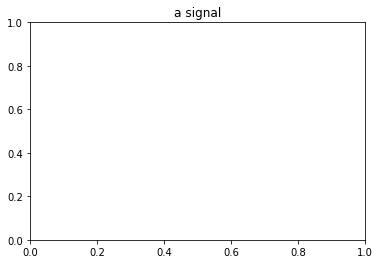

In [46]:
from myFormat.ze_plot_summary import one_signal_plot
st_temp_star=0
st_temp_end=42000

#one_signal_plot(t_totalNew_obs,stf_inverted_trace_filtered_shifted[:time_step_comp])
one_signal_plot(t_totalNew_obs[st_temp_star:st_temp_end],stf_inverted_trace_filtered_shifted[st_temp_star:st_temp_end])
#one_signal_plot(stf_load[:,0],stf_load[:,1],figtitle='hey',y_label='foo')

#### 1.8.3 save the initial delay adjusted istf 

In [ ]:
#### output the txt file: t_totalNew_obs and stf_inverted_trace_filtered
#
#execfile('pistf_save.py')

save_istf_delay_adjusted_txt_firstpart_fn = str_savefold + '/z2istf_delay_adjusted'
save_istf_txt_complete_fn = save_istf_delay_adjusted_txt_firstpart_fn  + '_trstar%03d_trend%03d' % (inv_trace_num_star,inv_trace_num_end)
stf_write=stf_inverted_trace_filtered_shifted

execfile('pistf_save_func.py')

In [ ]:
#save_istf_delay_adjusted_txt_firstpart_fn

### 1.9 this is to dump the interpolated observed data for later usage 

In [ ]:
##### run once would be enough
execfile('pinitial_data_load.py')

execfile('pdata_Re_obs_gene.py')

In [ ]:
save_Re_obs_pickledump_fn

## 2.0 check the recovered stf's influence, compare the received signals from     
#### specfem2d using inverted stf with the measured signals review the individual trace generated from the inverted source time function 

### 2.1 this is to load back the new observed data

In [ ]:
###data recovered as numpy as, one is interpolated observed data; the other is received data generated from the inverted source time function
execfile('plib_load.py')
str_savefold = 'src_csic_jp_results'
load_load_para_pickleopen_fn = str_savefold + '/load_para'
load_load_para_pickleopen_fn = str_savefold + '/load_para'
total_filename_pptx = str_savefold + '/zauto_results.pptx'
save_Re_obs_pickledump_fn = 'src_csic_jp_results/emFan01_SRC08_ts350_matdata_Re_obs.pickle'
execfile('pdata_Re_obs_load.py')







































































### 2.2 setup the individual traces to evaluate the inverted source

In [ ]:
#%%capture
%matplotlib inline
execfile('pconstant_setup_42000.py')

## length for comparison of number of time steps
Ntcomp= NtNewsyncomp; exp_para.Ntcomp = Ntcomp; 
# dtNew = 6e-9;
 
## data recovered as numpy as, one is interpolated observed data; the oth
## er is received data generated from the inverted source time function

## the trace number to compare
#trace_num = trace_seleted
trace_num = 88
trace_interp_obs = data_Re_obs[0:Ntsyncomp:SubSampleFact,trace_num]
print('shape of observed is :', trace_interp_obs.shape)
trace_Re_syn = - data_Re_syn[:NtNewsyncomp,trace_num-57]
print('shape of inverted source signal is :', trace_Re_syn.shape)

nfftNewobs2 = next_pow_2(Ntcomp);
#yf_Newobs_ = fft(trace_obs, axis=0, n=nfftNewobs)
# fft of the newly recovered signals
yf_trace_interp_obs = fft(trace_interp_obs, axis=0, n=nfftNewobs2)
yf_trace_inverted_syn = fft(trace_Re_syn, axis=0, n=nfftNewobs2)


In [ ]:
steps_length

### 2.3 plot the individual traces to evaluate the inverted source

In [ ]:
steps_length = Ntcomp
t_star_showsyn = 0
#t_star_showsyn = 10000
steps_length_temp = 30000
t_end_showsyn = steps_length + t_star_showsyn + steps_length_temp
t_star_showobs = t_star_showsyn 
t_end_showobs = steps_length + t_star_showobs + steps_length_temp
execfile('pplot_Re_one_spectrum.py')


#### 2.3.1 MATLAB - real data delay adjustment

In [ ]:
### travel time 

from seisflows.plugins.misfit import Traveltime
time_step_comp = Ntcomp
time_diff = - Traveltime(trace_Re_syn,trace_interp_obs,time_step_comp,dtNewobs)
print('difference in time in s for regenerated inverted source:', time_diff)
time_delay = int(round(time_diff/dtNewobs)) 



#time_delay = 5000
print('time delay:', time_delay)

a = np.zeros(np.abs(time_delay))
#stf_inverted_trace_filtered_shifted = np.append(a, stf_inverted_trace_filtered[:time_step_comp], axis=0)
### just for plotting, should adjust istf to the real data
trace_interp_obs_dj = np.append(a,trace_interp_obs[0:time_step_comp+time_delay], axis=0)

In [ ]:
trace_interp_obs.shape

In [ ]:
from myFormat.ze_plot_summary import one_signal_plot

one_signal_plot(t_totalNew_comp*1e6,trace_interp_obs_dj)

In [ ]:
one_signal_plot(t_totalNew_comp*1e6,trace_Re_syn)

In [ ]:
type(time_delay)


In [ ]:
print('shape of observed is :', trace_interp_obs.shape)
print('shape of inverted source signal is :', trace_Re_syn.shape)

#yf_Newobs_ = fft(trace_obs, axis=0, n=nfftNewobs)
# fft of the newly recovered signals
yf_trace_interp_obs = fft(trace_interp_obs, axis=0, n=nfftNewsyncomp)
yf_trace_inverted_syn = fft(trace_Re_syn, axis=0, n=nfftNewsyncomp)


#### 2.3.2 MATLAB - real data delay adjustment

In [ ]:
#%%capture
inv_trace_num_star=1
inv_trace_num_end=61
# inv_trace_num_star=58
# inv_trace_num_end=123
a = np.zeros(np.abs(time_delay))
 
for trace_num in range(inv_trace_num_star,inv_trace_num_end,60):
   
   trace_interp_obs = data_Re_obs[0:Ntsyncomp:SubSampleFact,trace_num+57]
   if time_delay < 0:  
      print('time delay negative')
      trace_interp_obs_dj = np.append(trace_interp_obs[-time_delay:time_step_comp],a, axis=0)
   else: 
      print('time delay nonnegative')
      trace_interp_obs_dj = np.append(a,trace_interp_obs[0:time_step_comp-time_delay], axis=0) 
   
    
   trace_interp_obs = trace_interp_obs_dj
   trace_Re_syn = - data_Re_syn[:Ntcomp,trace_num]
   yf_trace_interp_obs = fft(trace_interp_obs, axis=0, n=nfftNewsyncomp)
   yf_trace_inverted_syn = fft(trace_Re_syn, axis=0, n=nfftNewsyncomp)
   t_star_showsyn = 28000
   t_end_showsyn = 36000

   t_star_showobs = t_star_showsyn
   t_end_showobs = t_end_showsyn
   execfile('pplot_Re_one_spectrum.py')
   print('plotting the trace recovery = ',trace_num)


In [ ]:
save_evaluate_stfsff_complete_fn

In [ ]:
data_Re_obs.shape

In [ ]:
data_Re_syn.shape

### 2.4 multiple figure generation

In [ ]:
%%capture
inv_trace_num_star=1
inv_trace_num_end=61
for trace_num in range(inv_trace_num_star,inv_trace_num_end,5):
   
   execfile('pRetraceprepare.py')
   execfile('pplot_Re_one_spectrum.py')
   print('plotting the trace recovery = ',trace_num)


### 2.5 bandpass everything for inversion 

In [ ]:
plt.plot(filtered2_trace_interp_obs[24000:36000])

In [ ]:
freqmin2=350000
freqmax2=650000

filtered2_trace_interp_obs = bandpass(trace_interp_obs, freqmin2, freqmax2, fsNewobs, zerophase=True)
#yf_filtered2_trace_Re_syn = fft(filtered2_trace_Re_syn, axis=0, n=nfftNewsyn)
yf_filtered2_trace_interp_obs = fft(filtered2_trace_interp_obs, axis=0, n=nfftNewsyn)

t_starNew_showobs =22000
t_endNew_showobs = 42000

freq_step_starNewobs = 20
freq_step_endNewobs = 200

fig, (ax8,ax9) = plt.subplots(nrows=2)

# fig, (ax6,ax7,ax8,ax9) = plt.subplots(nrows=4)

# ax6.plot(t_totalNew_obs[t_starNew_showobs:t_endNew_showobs],filtered2_trace_Re_syn[t_starNew_showobs:t_endNew_showobs],'g-')
# ax6.set_title('rec - inverted stf filtered' + str(obs_name) + ' trace' + str(trace_num))
# #ax6.set_xlabel('time (us)')
# ax6.set_xlabel(r'time ($\mu s$)')

# ax7.plot(xf_Newobs[freq_step_starNewobs:freq_step_endNewobs]/1000,np.abs(yf_filtered2_trace_Re_syn[freq_step_starNewobs:freq_step_endNewobs]),'-g')
# ax7.set_title('rec - inverted sff filtered' + str(obs_name) + ' trace' + str(trace_num) )
# ax7.set_xlabel('frequency (kHz)')

ax8.plot(t_totalNew_obs[t_starNew_showobs:t_endNew_showobs],filtered2_trace_interp_obs[t_starNew_showobs:t_endNew_showobs],'m-')
ax8.set_title('rec - inverted stf trace filtered' + str(obs_name) + ' star_trace '+str(inv_trace_num_star)+ 'end_trace '+str(inv_trace_num_end))
ax8.set_xlabel(r'time ($\mu s$)')

ax9.plot(xf_Newobs[freq_step_starNewobs:freq_step_endNewobs]/1000,np.abs(yf_filtered2_trace_interp_obs[freq_step_starNewobs:freq_step_endNewobs]),'-m')
ax9.set_title('rec- inverted sff trace filtered' + str(obs_name) + ' star_trace '+str(inv_trace_num_star)+ 'end_trace '+str(inv_trace_num_end))
ax9.set_xlabel('frequency (kHz)')


plt.tight_layout(rect=[0, 0, 1.2, 2])
fig.show()
save_filterd_data_trace_complete_fn = save_filterd_data_trace_firstpart_fn + 'src01_rec%02d_fmin%d_fmax%d.png' % (trace_num,freqmin2,freqmax2)
#u_receives_signals_fn = 'obf/output/csic/Re_trace_compare_src01_rec%02d.png' % (trace_num)plt.savefig(save_evaluate_stfsff_complete_fn,format='png', dpi=200, bbox_inches='tight')
#plt.close()
plt.savefig(save_filterd_data_trace_complete_fn,format='png', dpi=200, bbox_inches='tight')
add_slide_ze(save_filterd_data_trace_complete_fn,total_filename_pptx)


### 2.5.0 playground - bandpass everything for inversion- testing filtering in the low frequency band  



In [67]:
stf_inverted_trace_filtered.shape

(65536,)

In [223]:
#%%capture
#execfile('plot_csic_main')
execfile('plib_load.py')

syn_file='Up_csic_rgauss_chi_f03000000_DT4d_9'

trace_seleted = 122
# trace_seleted = 89
trace_num = trace_seleted

In [224]:
%%capture
freqmin2=1
freqmax2=100000

#obs_file='obsFan01_SRC08_ts2500_mat'
obs_file='emFan01_SRC08_ts350_mat'
execfile('pinitial_data_load.py')
execfile('pconstant_setup_42000.py')
######################


em_data_obs = data_obs
# output: traceNew_obs,traceNew_syn，yf_Newobs，yf_Newsyn
execfile('ptraceprepare.py')
em_traceNew_obs = traceNew_obs
em_traceNew_obs_filtered = bandpass(em_traceNew_obs, freqmin2, freqmax2, fsNewobs, zerophase=True)
yf_em_traceNew_obs_filtered = fft(em_traceNew_obs_filtered, axis=0, n=nfftNewsyn)
######################


obs_file='obsFan01_SRC08_ts2500_mat'
######################
execfile('pinitial_data_load.py')
nem_data_obs = data_obs
# output: traceNew_obs,traceNew_syn，yf_Newobs，yf_Newsyn
execfile('ptraceprepare.py')
nem_traceNew_obs = traceNew_obs
nem_traceNew_obs_filtered = bandpass(nem_traceNew_obs, freqmin2, freqmax2, fsNewobs, zerophase=True)
yf_nem_traceNew_obs_filtered = fft(nem_traceNew_obs_filtered, axis=0, n=nfftNewsyn)
######################

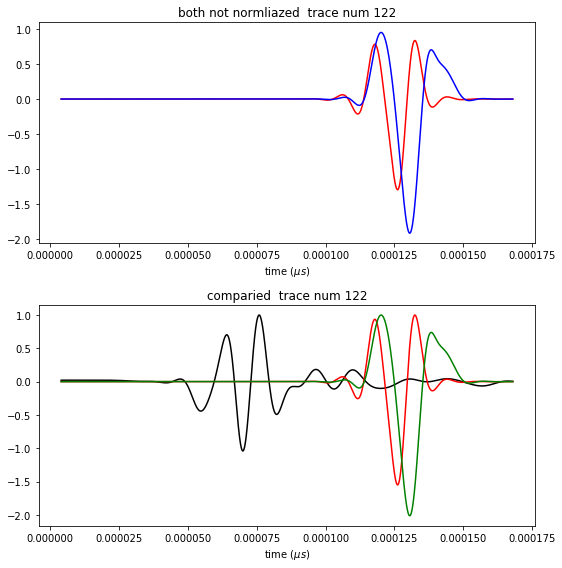

In [225]:
## all three, no spectrum included

t_starNew_showobs =1000
t_endNew_showobs = 42000

freq_step_starNewobs = 0
freq_step_endNewobs = 200

# fig, (ax8,ax9) = plt.subplots(nrows=2)

stf_inverted_trace_filtered_push = stf_inverted_trace_filtered[0:42000]
time_delay_guess = 16500
a = np.zeros(np.abs(time_delay_guess))
#stf_inverted_trace_filtered_shifted = np.append(a, stf_inverted_trace_filtered[:time_step_comp], axis=0)
stf_inverted_trace_filtered_push = np.append(a,stf_inverted_trace_filtered_push[0:t_endNew_showobs-time_delay_guess+1], axis=0)

 
fig, (ax10,ax11) = plt.subplots(nrows=2)


ax10.plot(t_totalNew_obs[t_starNew_showobs:t_endNew_showobs],em_traceNew_obs_filtered[t_starNew_showobs:t_endNew_showobs],'r-')
ax10.plot(t_totalNew_obs[t_starNew_showobs:t_endNew_showobs],nem_traceNew_obs_filtered[t_starNew_showobs:t_endNew_showobs],'b-')
ax10.set_title('both not normliazed  trace num %d' % trace_seleted)
ax10.set_xlabel(r'time ($\mu s$)')


ax11.plot(t_totalNew_obs[t_starNew_showobs:t_endNew_showobs],stf_inverted_trace_filtered[t_starNew_showobs:t_endNew_showobs]/max(stf_inverted_trace_filtered),'k-')
ax11.plot(t_totalNew_obs[t_starNew_showobs:t_endNew_showobs],em_traceNew_obs_filtered[t_starNew_showobs:t_endNew_showobs]/max(em_traceNew_obs_filtered),'r-')
#ax11.plot(t_totalNew_obs[t_starNew_showobs:t_endNew_showobs],nem_traceNew_obs_filtered[t_starNew_showobs:t_endNew_showobs]/max(nem_traceNew_obs_filtered),'b-')
ax11.plot(t_totalNew_obs[t_starNew_showobs:t_endNew_showobs],nem_traceNew_obs_filtered[t_starNew_showobs:t_endNew_showobs]/max(nem_traceNew_obs_filtered),'g-')
ax11.set_title('comparied  trace num %d' % trace_seleted)
ax11.set_xlabel(r'time ($\mu s$)')


#ax10.plot(t_totalNew_obs[t_starNew_showobs:t_endNew_showobs],stf_inverted_trace_filtered[t_starNew_showobs:t_endNew_showobs],'b-')


plt.tight_layout(rect=[0, 0, 1.3, 2])
fig.show()

save_frequency_tuning_firstpart_fn = str_savefold + '/kFilt'

save_frequency_tuning_complete_fn = save_frequency_tuning_firstpart_fn + 'src01_rec%02d_fmin%d_fmax%d.png' % (trace_num,freqmin2,freqmax2)

#u_receives_signals_fn = 'obf/output/csic/Re_trace_compare_src01_rec%02d.png' % (trace_num)plt.savefig(save_evaluate_stfsff_complete_fn,format='png', dpi=200, bbox_inches='tight')
#plt.close()
plt.savefig(save_frequency_tuning_complete_fn,format='png', dpi=200, bbox_inches='tight')
add_slide_ze(save_frequency_tuning_complete_fn,total_filename_pptx)


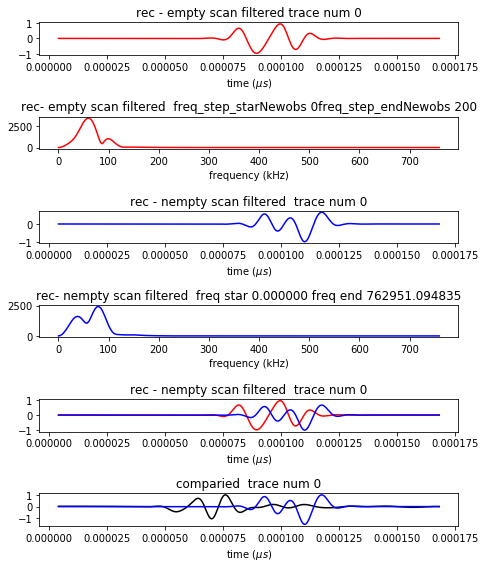

In [216]:
## mainly for measured data, spectrum included

### quick dirty way for evaluation 
t_starNew_showobs =1000
t_endNew_showobs = 42000

freq_step_starNewobs = 0
freq_step_endNewobs = 200

# fig, (ax8,ax9) = plt.subplots(nrows=2)

fig, (ax6,ax7,ax8,ax9,ax10,ax11) = plt.subplots(nrows=6)

ax6.plot(t_totalNew_obs[t_starNew_showobs:t_endNew_showobs],em_traceNew_obs_filtered[t_starNew_showobs:t_endNew_showobs],'r-')
ax6.set_title('rec - empty scan filtered trace num %d' % trace_seleted)
ax6.set_xlabel(r'time ($\mu s$)')

ax7.plot(xf_Newobs[freq_step_starNewobs:freq_step_endNewobs]/1000,np.abs(yf_em_traceNew_obs_filtered[freq_step_starNewobs:freq_step_endNewobs]),'-r')
ax7.set_title('rec- empty scan filtered' + '  freq_step_starNewobs '+str(freq_step_starNewobs)+ 'freq_step_endNewobs '+str(freq_step_endNewobs))
ax7.set_xlabel('frequency (kHz)')

ax8.plot(t_totalNew_obs[t_starNew_showobs:t_endNew_showobs],nem_traceNew_obs_filtered[t_starNew_showobs:t_endNew_showobs],'b-')
ax8.set_title('rec - nempty scan filtered  trace num %d' % trace_seleted)
ax8.set_xlabel(r'time ($\mu s$)')

ax9.plot(xf_Newobs[freq_step_starNewobs:freq_step_endNewobs]/1000,np.abs(yf_nem_traceNew_obs_filtered[freq_step_starNewobs:freq_step_endNewobs]),'-b')
ax9.set_title('rec- nempty scan filtered  freq star %5.6f freq end %5.6f' % (xf_Newobs[freq_step_starNewobs], xf_Newobs[freq_step_endNewobs]))
ax9.set_xlabel('frequency (kHz)')

ax10.plot(t_totalNew_obs[t_starNew_showobs:t_endNew_showobs],em_traceNew_obs_filtered[t_starNew_showobs:t_endNew_showobs],'r-')
ax10.plot(t_totalNew_obs[t_starNew_showobs:t_endNew_showobs],nem_traceNew_obs_filtered[t_starNew_showobs:t_endNew_showobs],'b-')
ax10.set_title('rec - nempty scan filtered  trace num %d' % trace_seleted)
ax10.set_xlabel(r'time ($\mu s$)')


ax11.plot(t_totalNew_obs[t_starNew_showobs:t_endNew_showobs],stf_inverted_trace_filtered[t_starNew_showobs:t_endNew_showobs]/max(stf_inverted_trace_filtered),'k-')
ax11.plot(t_totalNew_obs[t_starNew_showobs:t_endNew_showobs],nem_traceNew_obs_filtered[t_starNew_showobs:t_endNew_showobs]/max(nem_traceNew_obs_filtered),'b-')
ax11.set_title('comparied  trace num %d' % trace_seleted)
ax11.set_xlabel(r'time ($\mu s$)')


#ax10.plot(t_totalNew_obs[t_starNew_showobs:t_endNew_showobs],stf_inverted_trace_filtered[t_starNew_showobs:t_endNew_showobs],'b-')


plt.tight_layout(rect=[0, 0, 1.3, 2])
fig.show()

save_frequency_tuning_firstpart_fn = str_savefold + '/kFilt'

save_frequency_tuning_complete_fn = save_frequency_tuning_firstpart_fn + 'src01_rec%02d_fmin%d_fmax%d.png' % (trace_num,freqmin2,freqmax2)

#u_receives_signals_fn = 'obf/output/csic/Re_trace_compare_src01_rec%02d.png' % (trace_num)plt.savefig(save_evaluate_stfsff_complete_fn,format='png', dpi=200, bbox_inches='tight')
#plt.close()
plt.savefig(save_frequency_tuning_complete_fn,format='png', dpi=200, bbox_inches='tight')
add_slide_ze(save_frequency_tuning_complete_fn,total_filename_pptx)



## 3.0 cross correlation for the travel time difference, after rerun simulation.  - time steps

In [ ]:
print('stf_syn shape',stf_syn.shape)
print('stf_inverted_trace_filtered shape',stf_inverted_trace_filtered.shape)
print('t_totalNew_obs',t_totalNew_obs.shape)

### travel time 

from seisflows.plugins.misfit import Traveltime
time_step_comp = Ntsyn
time_diff = Traveltime(trace_interp_obs[:time_step_comp],trace_Re_syn[:time_step_comp],time_step_comp,dtNewobs)

print('difference in time in s for regenerated inverted source:', time_diff)
time_delay = - int(round(time_diff/dtNewobs))
print('differene in time delay in steps:', time_delay)


In [ ]:
a = np.zeros(np.abs(time_delay))
#stf_inverted_trace_filtered_shifted = np.append(a, stf_inverted_trace_filtered[:time_step_comp], axis=0)
stf_inverted_trace_filtered_shifted2 = np.append(stf_inverted_trace_filtered_shifted[time_delay:time_step_comp],a, axis=0)

In [ ]:
time_step_comp

In [ ]:
from myFormat.ze_plot_summary import one_signal_plot
st_temp_star=0
st_temp_end=3000

#one_signal_plot(t_totalNew_obs,stf_inverted_trace_filtered_shifted[:time_step_comp])
one_signal_plot(t_totalNew_obs[st_temp_star:st_temp_end],stf_inverted_trace_filtered_shifted2[st_temp_star:st_temp_end])
#one_signal_plot(stf_load[:,0],stf_load[:,1],figtitle='hey',y_label='foo')

In [ ]:
%%capture
# supress the printing function 
#trace_num = 120 
#for trace_num in range(0,170,30):

yf_stf_inverted_stack = np.zeros(1, dtype=np.complex)
for trace_num in range(0,176,1):
    #execfile('plot_csic.py')
    execfile('ptraceprepare.py')
    # Now we change into the frequency domain

    yf_NewNormobs = yf_Newobs/(max(yf_Newobs))
    yf_NewNormsyn = yf_Newsyn/(max(yf_Newsyn))

    #yf_obs_maxnormed = yf_obs/max(yf_obs)

    # normalized received signals in the frequency domain, for plotting purposes
    yf_Newsyn_filteredsyn = yf_Newsyn*syn_taper
    yf_Newsyn_filteredNormsyn = yf_Newsyn_filteredsyn/max(yf_Newsyn_filteredsyn)

    yf_Newsyn_filteredobs = yf_Newobs*syn_taper
    yf_Newsyn_filteredNormobs = yf_Newsyn_filteredobs/max(yf_Newsyn_filteredobs)

    
    # Now we invert for the source in the frequency domain (obs as gaussian for Greens'function )
    yf_stf_inverted = np.array([0.0+0.0j])
    for i in range(1, nfftNewsyn):
        if np.abs(yf_Newsyn_filteredsyn[i]) != 0:
            #yf_stf_inverted = np.append(yf_stf_inverted, (yf_Newsyn_filteredNormsyn[i].T*yf_Newobs[i].conj().T)/(yf_Newsyn_filteredNormsyn[i].T*yf_Newsyn_filteredNormsyn[i].conj().T))
            yf_stf_inverted = np.append(yf_stf_inverted, (yf_Newsyn_filteredsyn[i].T*yf_Newobs[i].conj().T)/(yf_Newsyn_filteredsyn[i].T*yf_Newsyn_filteredsyn[i].conj().T))
        else:
            yf_stf_inverted = np.append(yf_stf_inverted, 0.0+0.0j)
    yf_stf_inverted = yf_stf_inverted.conj().T
    #yf_stf_inverted = fft(stf_inverted[0:Nt], axis=0, n=nfft)
    yf_stf_inverted_stack = yf_stf_inverted_stack + yf_stf_inverted
    

In [ ]:
# stf_inverted=ifft(yf_stf_inverted,n=nfftNewsyn)
# stf_inverted_stack=ifft(yf_stf_inverted_stack,n=nfftNewsyn)

fig, (ax2,ax3,ax4,ax5) = plt.subplots(nrows=4)

ax2.plot(xf_Newobs[freq_step_starNewobs:freq_step_endNewobs]/1000,np.abs(yf_stf_inverted[freq_step_starNewobs:freq_step_endNewobs]),'-k')
ax2.set_title('inverted sff ' + str(obs_name) + ' trace  ' + str(trace_num) + '- absolute_value')
ax2.set_xlabel('frequency (kHz)')

ax3.plot(xf_Newobs[freq_step_starNewobs:freq_step_endNewobs]/1000,np.abs(yf_stf_inverted_stack[freq_step_starNewobs:freq_step_endNewobs]),'-k')
ax3.set_title('inverted sff stacked ' + str(obs_name) )
ax3.set_xlabel('frequency (kHz)')

ax4.plot(t_totalNew_obs[t_starNew_showobs:t_endNew_showobs],stf_inverted[t_starNew_showobs:t_endNew_showobs],'k-')
ax4.set_title('inverted stf - ' + str(obs_name) + ' trace ' + str(trace_num))
ax4.set_xlabel('time (us)')

ax5.plot(t_totalNew_obs[t_starNew_showobs:t_endNew_showobs],stf_inverted_stack[t_starNew_showobs:t_endNew_showobs],'k-')
ax5.set_title('inverted stf - stacked ' + str(obs_name))
ax5.set_xlabel('time (us)')

##ax5.plot(xf_Newobs[freq_step_starNewobs:freq_step_endNewobs]/1000,np.abs(yf_stf_inverted_stack[freq_step_starNewobs:freq_step_endNewobs]),'-k')
#ax5.set_title('inverted stf stacked ' + str(obs_name) + ' trace  ' + str(trace_num) + '- absolute_value')
#ax5.set_xlabel('frequency (kHz)')


plt.tight_layout(rect=[0, 0, 1.5, 2])

In [ ]:
import time


stf = open("obf/output/stf_tbd_csic","w")

for i in range(0,27000):#nstep + delay):
    stf.write("%20.19f " %t_totalNew_obs[i])
    stf.write("%20.19f\n" %stf_inverted_stack[i] )
    # to make sure the i/o is correct with the write function 
    #print(i)
    time.sleep(0.001)

In [ ]:
t_totalNew_obs.shape

In [ ]:
np.abs(yf_Newobs).shape

In [ ]:
import pickle
pickle.dump(exp_para,open('obf/input/exp_para.pickle','wb'))


In [ ]:
trace_inverted_obs = data_obs[:41000,trace_num]
print('shape of observed is :', trace_inverted_obs.shape)

In [ ]:
%%capture
execfile('plot_csic_main')

In [ ]:
trace_inverted_obs.shape

In [ ]:
%%capture
%matplotlib inline
execfile('pconstant_setup.py')

## length for comparison of number of time steps
Ntcomp=Ntsyn; exp_para.Ntcomp = Ntcomp; 
# dtNew = 6e-9;
t_src_comp = np.arange(dtNew,Ntcomp*dtNew+dtNew,dtNew)


## data recovered as numpy as, one is interpolated observed data; the oth
## er is received data generated from the inverted source time function
execfile('pdata_Re_obs_load.py')

## the trace number to compare
trace_num = 88

trace_interp_obs = data_Re_obs[:Ntcomp,trace_num]
print('shape of observed is :', trace_interp_obs.shape)
trace_Re_syn = data_Re_syn[:Ntcomp,trace_num]
print('shape of inverted source signal is :', trace_Re_syn.shape)

#yf_Newobs_ = fft(trace_obs, axis=0, n=nfftNewobs)
# fft of the newly recovered signals
yf_trace_inverted_syn = fft(trace_Re_syn, axis=0, n=nfftNewsyn)


In [ ]:
#print('the shape of the synthetic data using the inverted signals: ', data_Re_syn.shape)
#print('the shape of the observed data: ', data_Re_obs.shape)


In [ ]:
steps_length = 3000

t_star_showsyn = 15000
t_end_showsyn = steps_length + t_star_showsyn

t_star_showobs = 20500
t_end_showobs = steps_length + t_star_showobs

execfile('pplot_Re_one_spectrum.py')


### 1.1 plot the received signals

In [ ]:
1.1 # plot the received signals
time_star= 800 * dtobs
time_end = 2700 * dtobs


t_star_show = int(time_star/dtNew)
t_end_show = int(time_end/dtNew)

t_star_showsyn = int(time_star/dtsyn)
t_end_showsyn = int(time_end/dtsyn)

t_star_showobs = int(time_star/dtobs)
t_end_showobs = int(time_end/dtobs)

t_starNew_showobs = int(time_star/dtNewobs)
t_endNew_showobs = int(time_end/dtNewobs)


fig, (ax0,ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(nrows=7)

ax0.plot(sample_syn[t_star_showsyn:t_end_showsyn],trace_syn[t_star_showsyn:t_end_showsyn],'b-')
ax0.set_title('synthetic - ' + str(syn_name) + ' trace ' + str(trace_num))
ax0.set_xlabel('time steps')

ax1.plot(sample_obs[t_star_showobs:t_end_showobs],trace_obs[t_star_showobs:t_end_showobs],'k-')
ax1.set_title('observed - ' + str(obs_name) + ' trace ' + str(trace_num))
ax1.set_xlabel('time steps')

ax2.plot(t_total_syn[t_star_showsyn:t_end_showsyn],trace_syn[t_star_showsyn:t_end_showsyn],'b-')
ax2.set_title('synthetic - ' + str(syn_name) + ' trace ' + str(trace_num))
ax2.set_xlabel('time (s)')

ax3.plot(t_total_obs[t_star_showobs:t_end_showobs],trace_obs[t_star_showobs:t_end_showobs],'k-')
ax3.set_title('observed - ' + str(obs_name) + ' trace ' + str(trace_num))
ax3.set_xlabel('time (s)')

ax4.plot(t_totalNew_obs[t_starNew_showobs:t_endNew_showobs],traceNew_obs[t_starNew_showobs:t_endNew_showobs],'k-')
ax4.set_title('observed resampled - ' + str(obs_name) + ' trace ' + str(trace_num))
ax4.set_xlabel('time (s)')

ax5.plot(t_totalNew_obs[t_starNew_showobs:t_endNew_showobs],traceNew_detrendobs[t_starNew_showobs:t_endNew_showobs],'k-')
ax5.set_title('observed resampled detrend - ' + str(obs_name) + ' trace ' + str(trace_num))
ax5.set_xlabel('time (s)')

ax6.plot(t_totalNew_obs[t_starNew_showobs:t_endNew_showobs],traceNew_detrend_filteredobs[t_starNew_showobs:t_endNew_showobs],'k-')
ax6.set_title('observed resampled detrend filtered - ' + str(obs_name) + ' trace ' + str(trace_num))
ax6.set_xlabel('time (s)')


plt.tight_layout(rect=[0, 0, 3, 4])
fig.show()

### 2.0  We now generate the frequency filter that has already been applied to the processed field data. We plot the filter to verify.

In [ ]:
import numpy as np
from scipy import signal
from obspy.signal.util import _npts2nfft
from scipy.fftpack import fft, ifft, fftfreq

# Setup prefilter with cosine taper
#npts = len(field_trace.data) # resampled trace so different from FieldDataProcessing
#print('npts',npts)
#nfft = _npts2nfft(npts)

tukey_end_freq = 8000000
tukey_length = int(round(tukey_end_freq/dfNew_padResyn))
print('tukey_length',tukey_length)

print('nfft',nfft)
print('nfftNewobs',nfftNewobs)

freq_pos = signal.tukey(tukey_length, alpha=0.02)
print('freq_pos.shape - tukey',freq_pos.shape)
freq_pos = np.pad(freq_pos, 1,'constant',constant_values=0)
print('freq_pos.shape - pad',freq_pos.shape)
freq_pos.resize(nfftNewobs/2)
print('freq_pos.shape - resize',freq_pos.shape)
freq_neg = freq_pos[::-1]
print('freq_neg.shape - freq_pos[::-1]',freq_neg.shape)
syn_taper = np.append(freq_pos, freq_neg)
print('syn_taper.shape - append',syn_taper.shape)
syn_taper
# Plot the filter
freqs = fftfreq(nfftNewsyn, d=dfNew_padResyn)
#freqs = fftfreq(nfft, d=0.000000003)

#plt.plot(freqs[0:120]/1e3,freq_pos[0:120])
plt.plot(xf_Newobs[freq_step_starNewsyn-1:freq_step_endNewsyn-1]/1e3,freq_pos[freq_step_starNewsyn-1:freq_step_endNewsyn-1])
plt.title('Tukey Window Taper Applied')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Gain')

In [ ]:
xf_Newobs.shape

In [ ]:
freq_pos[1-1:1600-1]

In [ ]:
dfNew_padResyn

In [ ]:
# Now we change into the frequency domain

yf_NewNormobs = yf_Newobs/(max(yf_Newobs))
yf_NewNormsyn = yf_Newsyn/(max(yf_Newsyn))

#yf_obs_maxnormed = yf_obs/max(yf_obs)

# normalized received signals in the frequency domain, for plotting purposes
yf_Newsyn_filteredsyn = yf_Newsyn*syn_taper
yf_Newsyn_filteredNormsyn = yf_Newsyn_filteredsyn/max(yf_Newsyn_filteredsyn)

yf_Newsyn_filteredobs = yf_Newobs*syn_taper
yf_Newsyn_filteredNormobs = yf_Newsyn_filteredobs/max(yf_Newsyn_filteredobs)


# Plot the spectrums
#plt.plot(freqs,syn_taper)
#plt.plot(freqs,np.abs(yf_syn_maxnormed),color="black")
#plt.plot(freqs,np.abs(yf_stf_obs_maxnormed),color="red")
plt.plot(xf_Newobs[freq_step_starNewsyn-1:freq_step_endNewsyn-1]/1e3,syn_taper[freq_step_starNewsyn-1:freq_step_endNewsyn-1])
plt.plot(xf_Newsyn[freq_step_starNewsyn-1:freq_step_endNewsyn-1]/1e3,np.abs(yf_Newsyn_filteredNormsyn[freq_step_starNewsyn-1:freq_step_endNewsyn-1]),color="black")
plt.plot(xf_Newobs[freq_step_starNewsyn-1:freq_step_endNewsyn-1]/1e3,np.abs(yf_Newsyn_filteredNormobs[freq_step_starNewsyn-1:freq_step_endNewsyn-1]),color="red")

#plt.plot(xf_Newsyn[freq_step_star-1:freq_step_end-1]/1e3,syn_taper[freq_step_star-1:freq_step_end-1])
#plt.plot(xf[freq_step_star-1:freq_step_end-1]/1e3,np.abs(yf_obs_maxnormed[freq_step_star-1:freq_step_end-1]),color="black")
#plt.plot(xf[freq_step_star-1:freq_step_end-1]/1e3,np.abs(yf_syn_filtered_maxnormed[freq_step_star-1:freq_step_end-1]),color="red")

plt.legend(['Filter for G', 'Obs Data', "Green's Function - filtered syn signal "])

In [ ]:
# Now we invert for the source in the frequency domain (obs as gaussian for Greens'function )
yf_stf_inverted = np.array([0.0+0.0j])
for i in range(1, nfftNewsyn):
    if np.abs(yf_Newsyn_filteredsyn[i]) != 0:
        #yf_stf_inverted = np.append(yf_stf_inverted, (yf_Newsyn_filteredNormsyn[i].T*yf_Newobs[i].conj().T)/(yf_Newsyn_filteredNormsyn[i].T*yf_Newsyn_filteredNormsyn[i].conj().T))
        yf_stf_inverted = np.append(yf_stf_inverted, (yf_Newsyn_filteredsyn[i].T*yf_Newobs[i].conj().T)/(yf_Newsyn_filteredsyn[i].T*yf_Newsyn_filteredsyn[i].conj().T))
    else:
        yf_stf_inverted = np.append(yf_stf_inverted, 0.0+0.0j)
yf_stf_inverted = yf_stf_inverted.conj().T
#yf_stf_inverted = fft(stf_inverted[0:Nt], axis=0, n=nfft)
stf_inverted=ifft(yf_stf_inverted,n=nfftNewsyn)


### 2.1 post processing the inverted stf

In [ ]:
# filtering 
freqmin=30000
freqmax=5000000

#traceNew_detrendobs = np.copy(signal.detrend(traceNew_obs))
#yf_traceNew_detrendobs = fft(traceNew_detrendobs, axis=0, n=nfftNewobs)
stf_inverted_detrend_filtered = bandpass(stf_inverted_detrend, freqmin, freqmax, fsNewobs, zerophase=True)
yf_stf_inverted_detrend_filtered = fft(stf_inverted_detrend_filtered, axis=0, n=nfftNewobs) 


# stf_inverted_shifted_filtered = bandpass(stf_inverted_shifted, freqmin, freqmax, fs_new, zerophase=True)
# yf_stf_inverted_shifted_filtered = fft(stf_inverted_shifted_filtered, axis=0, n=nfft)


In [ ]:
# sff - source frequency function 
fig, (ax0,ax1,ax2,ax3) = plt.subplots(nrows=4)

ax0.plot(t_totalNew_obs[t_starNew_showobs:t_endNew_showobs],stf_inverted[t_starNew_showobs:t_endNew_showobs],'m-')
ax0.set_title('Inverted stf - ' + str(obs_name) + ' trace ' + str(trace_num))
ax0.set_xlabel('time (s)')

ax1.plot(xf_Newobs[freq_step_starNewsyn-1:freq_step_endNewsyn-1]/1000,np.abs(yf_stf_inverted[freq_step_starNewsyn-1:freq_step_endNewsyn-1]),'-m')
ax1.set_title( 'Inverted sff ')
ax1.set_xlabel('frequency (kHz)')

ax2.plot(t_totalNew_obs[t_starNew_showobs:t_endNew_showobs],stf_inverted_detrend_filtered[t_starNew_showobs:t_endNew_showobs],'r-')
ax2.set_title('Inverted detrend filtered stf - ' + str(obs_name) + ' trace ' + str(trace_num))
ax2.set_xlabel('time (s)')

ax3.plot(xf_Newobs[freq_step_starNewsyn-1:freq_step_endNewsyn-1]/1000,np.abs(yf_stf_inverted_detrend_filtered[freq_step_starNewsyn-1:freq_step_endNewsyn-1]),'-r')
ax3.set_title( 'Inverted detrend filtered sff')
ax3.set_xlabel('frequency (kHz)')

#ax1.plot(xf[freq_step_star-1:freq_step_end-1]/1000,np.abs(yf_stf_obs[freq_step_star-1:freq_step_end-1]),'-k')
#ax1.set_title( 'observed - gaussian, stf, absolute_value - zoom in')
#ax1.set_xlabel('frequency (kHz)')

plt.tight_layout(rect=[0, 0, 2, 2])

fig.show()